In [1]:
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of th

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sklearn
sklearn.__version__

'0.21.3'

-Generating the data  for KNN
 -Generate values for class 0:
  . Generate x1 values within the range 0 to 50
  .Generate x2 values within the range 1 to 50
  .create 2nd array with x1 value as 0 th element and x2 values as 1st
 element, 3rd value is zero
     -o/p [[2,5,0],[3,10,0],[24,12.0]]
  
 -Generate values for class 1:
  .Generate x1 values within the range 0 to 50
  .Generate x2 values within the range 1 to 50
 element,3rd value is one
 - create 2nd array consists both classes data
  
  
   

In [5]:
x1=np.random.randint(0,50,50)
x1

array([ 3, 32, 46, 27, 35, 16,  6, 28, 48,  7, 32, 46, 17, 28, 23, 21,  4,
       31, 31,  8, 29, 32,  0, 40, 42,  1, 33, 45,  5, 28, 27, 28, 35, 35,
       43,  2, 39, 11,  3, 27, 18, 40, 33, 43, 48,  4, 10, 24, 44,  0])

In [6]:
x2=np.random.randint(0,50,50)
x2

array([43, 44, 27, 42, 31,  7, 16, 36, 26, 42, 26, 12,  5, 21, 28, 25,  2,
       21, 22, 43, 49, 19,  8, 37, 25, 27, 47, 41, 22, 46, 28, 20, 33, 38,
       36, 21,  3, 46, 28, 29,  4, 35,  9, 45, 34, 48,  9, 35,  2, 30])

In [7]:
np.random.seed(6)
x1=np.random.randint(0,50,50)
x2=np.random.randint(0,50,50)
x1,x2

(array([10,  9, 35, 20, 42, 45, 15, 42, 16, 25,  1, 11, 13, 26, 47, 33, 44,
        46,  4, 33,  8,  2, 12, 20, 27, 31,  2,  5, 26, 15, 25, 22, 43,  5,
        37, 49,  4, 37, 16,  2,  2, 19, 21, 28, 43,  5, 26, 14, 40,  5]),
 array([ 6, 42, 26, 10,  3, 21, 11,  1, 18, 35, 22, 41, 41, 24, 48, 42,  3,
         7, 36, 11, 33, 12,  4, 33, 15,  5, 47, 21,  6,  1,  9, 48, 37, 42,
        40, 13,  9,  1, 18,  2, 25, 21, 12, 42,  4, 29, 49, 14, 22,  3]))

In [8]:
np.vstack((x1,x2))

array([[10,  9, 35, 20, 42, 45, 15, 42, 16, 25,  1, 11, 13, 26, 47, 33,
        44, 46,  4, 33,  8,  2, 12, 20, 27, 31,  2,  5, 26, 15, 25, 22,
        43,  5, 37, 49,  4, 37, 16,  2,  2, 19, 21, 28, 43,  5, 26, 14,
        40,  5],
       [ 6, 42, 26, 10,  3, 21, 11,  1, 18, 35, 22, 41, 41, 24, 48, 42,
         3,  7, 36, 11, 33, 12,  4, 33, 15,  5, 47, 21,  6,  1,  9, 48,
        37, 42, 40, 13,  9,  1, 18,  2, 25, 21, 12, 42,  4, 29, 49, 14,
        22,  3]])

In [9]:
np.hstack((x1,x2))

array([10,  9, 35, 20, 42, 45, 15, 42, 16, 25,  1, 11, 13, 26, 47, 33, 44,
       46,  4, 33,  8,  2, 12, 20, 27, 31,  2,  5, 26, 15, 25, 22, 43,  5,
       37, 49,  4, 37, 16,  2,  2, 19, 21, 28, 43,  5, 26, 14, 40,  5,  6,
       42, 26, 10,  3, 21, 11,  1, 18, 35, 22, 41, 41, 24, 48, 42,  3,  7,
       36, 11, 33, 12,  4, 33, 15,  5, 47, 21,  6,  1,  9, 48, 37, 42, 40,
       13,  9,  1, 18,  2, 25, 21, 12, 42,  4, 29, 49, 14, 22,  3])

In [10]:
np.random.seed(10)
x1=np.random.randint(0,50,50)
x2=np.random.randint(0,50,50)
x1,x2

(array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
        16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
        22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11]),
 array([28, 10, 24,  9, 15, 18, 16,  7, 24, 11, 17, 46,  7, 11, 28, 33, 20,
        32, 24, 44,  5,  4,  7, 24, 24, 44, 34, 40, 15, 13, 24, 15,  6, 21,
        42, 22, 11, 48, 12, 28, 32, 49, 15, 44, 40, 42, 45, 43, 33, 45]))

In [11]:
import numpy as np
x1_2d=np.expand_dims(x1,1)
x2_2d=np.expand_dims(x2,1)
y_2d=np.expand_dims(np.zeros(50,dtype=int),1)
x1_2d

array([[ 9],
       [36],
       [15],
       [ 0],
       [49],
       [28],
       [25],
       [29],
       [48],
       [29],
       [49],
       [ 8],
       [ 9],
       [ 0],
       [42],
       [40],
       [36],
       [16],
       [36],
       [47],
       [11],
       [24],
       [43],
       [33],
       [ 8],
       [36],
       [14],
       [49],
       [13],
       [ 5],
       [13],
       [25],
       [13],
       [28],
       [22],
       [30],
       [30],
       [25],
       [12],
       [ 1],
       [31],
       [36],
       [27],
       [18],
       [29],
       [13],
       [22],
       [23],
       [30],
       [11]])

In [16]:
np.hstack((x1_2d,x2_2d,y_2d))

array([[ 9, 28,  0],
       [36, 10,  0],
       [15, 24,  0],
       [ 0,  9,  0],
       [49, 15,  0],
       [28, 18,  0],
       [25, 16,  0],
       [29,  7,  0],
       [48, 24,  0],
       [29, 11,  0],
       [49, 17,  0],
       [ 8, 46,  0],
       [ 9,  7,  0],
       [ 0, 11,  0],
       [42, 28,  0],
       [40, 33,  0],
       [36, 20,  0],
       [16, 32,  0],
       [36, 24,  0],
       [47, 44,  0],
       [11,  5,  0],
       [24,  4,  0],
       [43,  7,  0],
       [33, 24,  0],
       [ 8, 24,  0],
       [36, 44,  0],
       [14, 34,  0],
       [49, 40,  0],
       [13, 15,  0],
       [ 5, 13,  0],
       [13, 24,  0],
       [25, 15,  0],
       [13,  6,  0],
       [28, 21,  0],
       [22, 42,  0],
       [30, 22,  0],
       [30, 11,  0],
       [25, 48,  0],
       [12, 12,  0],
       [ 1, 28,  0],
       [31, 32,  0],
       [36, 49,  0],
       [27, 15,  0],
       [18, 44,  0],
       [29, 40,  0],
       [13, 42,  0],
       [22, 45,  0],
       [23, 4

In [19]:
d0=np.hstack((x1_2d,x2_2d,y_2d))
d0

array([[ 9, 28,  0],
       [36, 10,  0],
       [15, 24,  0],
       [ 0,  9,  0],
       [49, 15,  0],
       [28, 18,  0],
       [25, 16,  0],
       [29,  7,  0],
       [48, 24,  0],
       [29, 11,  0],
       [49, 17,  0],
       [ 8, 46,  0],
       [ 9,  7,  0],
       [ 0, 11,  0],
       [42, 28,  0],
       [40, 33,  0],
       [36, 20,  0],
       [16, 32,  0],
       [36, 24,  0],
       [47, 44,  0],
       [11,  5,  0],
       [24,  4,  0],
       [43,  7,  0],
       [33, 24,  0],
       [ 8, 24,  0],
       [36, 44,  0],
       [14, 34,  0],
       [49, 40,  0],
       [13, 15,  0],
       [ 5, 13,  0],
       [13, 24,  0],
       [25, 15,  0],
       [13,  6,  0],
       [28, 21,  0],
       [22, 42,  0],
       [30, 22,  0],
       [30, 11,  0],
       [25, 48,  0],
       [12, 12,  0],
       [ 1, 28,  0],
       [31, 32,  0],
       [36, 49,  0],
       [27, 15,  0],
       [18, 44,  0],
       [29, 40,  0],
       [13, 42,  0],
       [22, 45,  0],
       [23, 4

In [21]:
import numpy as np
x1=np.random.randint(50,100,50)
x2=np.random.randint(1,50,50)
x1_2d=np.expand_dims(x1,1)
x2_2d=np.expand_dims(x2,1)
y_2d=np.expand_dims(np.zeros(50,dtype=int),1)
d1=np.hstack((x1_2d,x2_2d,y_2d))
d1


array([[90, 46,  0],
       [75, 12,  0],
       [59, 23,  0],
       [87, 38,  0],
       [50, 12,  0],
       [68, 22,  0],
       [73, 34,  0],
       [53, 32,  0],
       [79, 44,  0],
       [66, 25,  0],
       [70, 33,  0],
       [68, 38,  0],
       [98, 10,  0],
       [64, 41,  0],
       [65, 38,  0],
       [67, 44,  0],
       [75, 44,  0],
       [96, 27,  0],
       [98,  8,  0],
       [92,  9,  0],
       [67, 22,  0],
       [82,  9,  0],
       [67, 29,  0],
       [91, 46,  0],
       [66, 31,  0],
       [91, 26,  0],
       [76, 26,  0],
       [62, 15,  0],
       [80, 18,  0],
       [67, 22,  0],
       [67, 14,  0],
       [66, 42,  0],
       [50, 34,  0],
       [81,  5,  0],
       [87, 24,  0],
       [59, 31,  0],
       [50, 29,  0],
       [88, 40,  0],
       [72, 28,  0],
       [82, 40,  0],
       [52, 10,  0],
       [53,  8,  0],
       [81, 23,  0],
       [85, 33,  0],
       [77,  4,  0],
       [68, 10,  0],
       [63, 13,  0],
       [93,  

In [23]:
data=np.vstack((d0,d1))
data

array([[ 9, 28,  0],
       [36, 10,  0],
       [15, 24,  0],
       [ 0,  9,  0],
       [49, 15,  0],
       [28, 18,  0],
       [25, 16,  0],
       [29,  7,  0],
       [48, 24,  0],
       [29, 11,  0],
       [49, 17,  0],
       [ 8, 46,  0],
       [ 9,  7,  0],
       [ 0, 11,  0],
       [42, 28,  0],
       [40, 33,  0],
       [36, 20,  0],
       [16, 32,  0],
       [36, 24,  0],
       [47, 44,  0],
       [11,  5,  0],
       [24,  4,  0],
       [43,  7,  0],
       [33, 24,  0],
       [ 8, 24,  0],
       [36, 44,  0],
       [14, 34,  0],
       [49, 40,  0],
       [13, 15,  0],
       [ 5, 13,  0],
       [13, 24,  0],
       [25, 15,  0],
       [13,  6,  0],
       [28, 21,  0],
       [22, 42,  0],
       [30, 22,  0],
       [30, 11,  0],
       [25, 48,  0],
       [12, 12,  0],
       [ 1, 28,  0],
       [31, 32,  0],
       [36, 49,  0],
       [27, 15,  0],
       [18, 44,  0],
       [29, 40,  0],
       [13, 42,  0],
       [22, 45,  0],
       [23, 4

In [25]:
df=pd.DataFrame(data,columns=['x1','x2','y_2d'])
df.head()

,x1,x2,y_2d
0,9,28,0
1,36,10,0
2,15,24,0
3,0,9,0
4,49,15,0


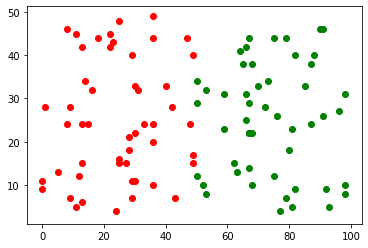

In [26]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')

In [27]:
outcome=df['y_2d']#
features=df[['x1','x2']]
outcome[2],features.iloc[0]

(0, x1     9
 x2    28
 Name: 0, dtype: int32)

In [28]:
import math

In [29]:
def Excledian_distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

In [30]:
Excledian_distance((4,3),(0,0))

5.0

In [31]:
def Knearest_points(p,d,k):#
    '''p-new datapoint
    d-all the features as numpy array
    k-no of neighbors
    returns the k nearest neighbors'''
    distances=[]
    for row in d:
        distances.append(Excledian_distance(row,p))
    distances=np.array(distances)
    return distances.argsort()[:k]

In [32]:
l=[47,67,45,78,43]#
l=np.array(l)
l.argsort()


array([4, 2, 0, 1, 3], dtype=int64)

In [33]:
for row in features.values:#
    print(row)
    break

[ 9 28]


In [34]:
near_4 = Knearest_points((5,34),features.values,4)#

IndexError: too many indices for array

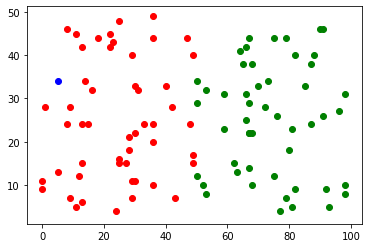

In [35]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')#
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')
plt.plot(5,34,'bo')
plt.scatter(near_4[:,0],near_4[:,1],color='y')

In [36]:
ind=Knearest_points((5,34),features.values,4)#
features.values[ind]
outcome[ind]
outcome.value_counts()
outcome.value_counts().index[0]

0

In [64]:
df.to_csv("knn.csv")#

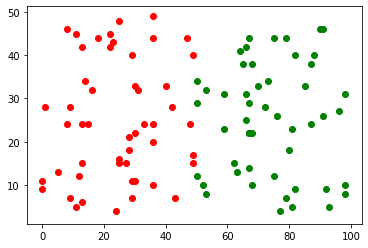

In [65]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
data = pd.read_csv('knn.csv')
#data.columns
data.drop('Unnamed: 0',axis=1,inplace=True)


In [69]:
data.head()


,x1,x2,y_2d
0,9,28,0
1,36,10,0
2,15,24,0
3,0,9,0
4,49,15,0


In [73]:
features = data[['x1','x2']]
target = data['y_2d']


In [74]:
class knn():
    def __init__(self,distance='L2',k = 5):
        self.distance = distance
        self.k=k
    def fit(self,features,target):
        self.features = features
        self.target = target
    def eucledian_distance(self,p1,p2):
        return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    def manhattan_distance(self,p1,p2):
        return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])
    def nearest_neighbors_indices(self,p):
        if self.distance=='L1':
            self.distances = []
            for i,feature in self.features.iterrows():
                self.distances.append(self.manhattan_distance\
                                      (p,feature))
            self.distances = np.array(self.distances)
            return self.distances.argsort()[:self.k]
        elif self.distance=='L2':
            self.distances = []
            for i,feature in self.features.iterrows():
                self.distances.append(self.eucledian_distance\
                                      (p,feature))
            self.distances = np.array(self.distances)
            return self.distances.argsort()[:self.k]
        
    def predict(self,test):
        # test - data observations to predict outcomes
        # test is a DataFrame
        outputs =[]
        for _,feature in test.iterrows():
            ind = self.nearest_neighbors_indices(feature)
            outputs.append(self.target[ind].\
                           value_counts().index[0])
        return outputs

In [81]:
obj = knn()
obj.fit(features,target)
obj.predict(test)


[0, 0, 0, 0]

In [122]:
pred = np.array(obj.predict(features))
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [79]:
features.iloc[5,:]


x1    28
x2    18
Name: 5, dtype: int64

In [123]:
test = pd.DataFrame(np.array([[23,49],[34,43],[12,27],[60,10]]))
test


,0,1
0,23,49
1,34,43
2,12,27
3,60,10


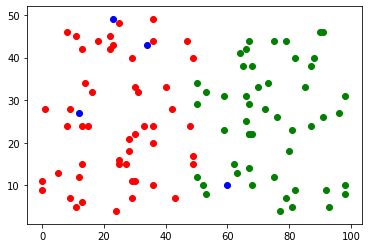

In [82]:
plt.scatter(features['x1'][:50],features['x2'][:50],
            color = 'r')
plt.scatter(features['x1'][50:],features['x2'][50:],
            color = 'g')
plt.scatter(test[0],test[1],color='b')

In [83]:
from sklearn.neighbors import KNeighborsClassifier
obj1 = KNeighborsClassifier()
obj1.fit(features,target)
obj1.predict(test)


array([0, 0, 0, 0], dtype=int64)

In [84]:
obj1.predict(features)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [124]:
np.array(target)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [85]:
obj1.predict

<bound method KNeighborsClassifier.predict of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [126]:
def accuracy(y,y_pred):
    return round((y==y_pred).sum() / (y.shap[0])*100,2)

In [127]:
accuracy(np.array([1,1,0]),np.array([0,1,0]))

AttributeError: 'numpy.ndarray' object has no attribute 'shap'

In [128]:
from sklearn.ma

SyntaxError: invalid syntax (<ipython-input-128-45586df7eaa2>, line 1)

In [103]:
#import the minmaxscaler
from sklearn.preprocessing import MinMaxScaler 
#create an inst
sc=MinMaxScaler()
sc.fit(features)
sc.transform(features)


array([[0.09183673, 0.53333333],
       [0.36734694, 0.13333333],
       [0.15306122, 0.44444444],
       [0.        , 0.11111111],
       [0.5       , 0.24444444],
       [0.28571429, 0.31111111],
       [0.25510204, 0.26666667],
       [0.29591837, 0.06666667],
       [0.48979592, 0.44444444],
       [0.29591837, 0.15555556],
       [0.5       , 0.28888889],
       [0.08163265, 0.93333333],
       [0.09183673, 0.06666667],
       [0.        , 0.15555556],
       [0.42857143, 0.53333333],
       [0.40816327, 0.64444444],
       [0.36734694, 0.35555556],
       [0.16326531, 0.62222222],
       [0.36734694, 0.44444444],
       [0.47959184, 0.88888889],
       [0.1122449 , 0.02222222],
       [0.24489796, 0.        ],
       [0.43877551, 0.06666667],
       [0.33673469, 0.44444444],
       [0.08163265, 0.44444444],
       [0.36734694, 0.88888889],
       [0.14285714, 0.66666667],
       [0.5       , 0.8       ],
       [0.13265306, 0.24444444],
       [0.05102041, 0.2       ],
       [0.

In [104]:

features_sc=pd.DataFrame(sc.transform(features),columns=features.columns)

In [105]:
features_sc

,x1,x2
0,0.091837,0.533333
1,0.367347,0.133333
2,0.153061,0.444444
3,0.000000,0.111111
4,0.500000,0.244444
...,...,...
95,0.693878,0.133333
96,0.642857,0.200000
97,0.948980,0.022222
98,1.000000,0.600000


In [106]:
features_sc.describe()

,x1,x2
count,100.000000,100.000000
mean,0.501939,0.468000
std,0.288931,0.294605
min,0.000000,0.000000
25%,0.255102,0.194444
50%,0.505102,0.444444
75%,0.737245,0.688889
max,1.000000,1.000000


In [ ]:
from sklearn.neighbor

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(features_sc,target)
knc.predict(features_sc)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(target,knc.predict(features_sc))

1.0

In [110]:
test

,0,1
0,23,49
1,34,43
2,12,27
3,60,10


In [111]:
knc.predict(test)

array([0, 0, 0, 0], dtype=int64)

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_tarin,y_test=train_test_split(features,target,random_state=33)

In [116]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [119]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 2)
(25, 2)


NameError: name 'y_train' is not defined

In [120]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _isotonic
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experimental (package)
    externals (package)
    feature_extraction (p

In [121]:
#train the KNN with x_tarin,y_train
knc1=KNeighborsClassifier()
knc1.fit(x_train,y_train)

NameError: name 'y_train' is not defined